In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/colab2/'
file_name=root_path+'spam_ham_dataset.csv'

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv(file_name)

In [ ]:
df.sample(5)

,Unnamed: 0,label,text,label_num
3072,2527,ham,Subject: meter 986315\r\nfor dec . and jan . p...,0
3146,1615,ham,"Subject: enron / hpl actuals for sept . 14 , 2...",0
4745,5106,spam,"Subject: get back to me please\r\nshow , use ,...",1
4831,370,ham,"Subject: estimate file updates\r\ndave ,\r\npl...",0
1064,3086,ham,Subject: neon week # 9\r\n- experiencing god w...,0


In [ ]:
df.shape

(5171, 4)

In [ ]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
# drop last 3 cols
df.drop(columns=['Unnamed: 0','label'],inplace=True)

In [ ]:
df.sample(5)

,text,label_num
139,"Subject: my brother ' s dream one nlght , i la...",1
22,"Subject: hpl nom for january 25 , 2001\r\n( se...",0
4456,Subject: re : feedback monitor error - meter 9...,0
1688,Subject: enhance your chest size\r\nemail is l...,1
4990,Subject: nom change for the 5 th\r\n- - - - - ...,0


In [ ]:
# renaming the cols
df.rename(columns={'label_num':'target','text':'text'},inplace=True)
df.sample(5)

,text,target
4996,Subject: software 75 % off downdraft\r\nwindow...,1
4726,Subject: u . s . robotics - analogue / wired c...,1
4806,"Subject: re : your app response sun , 10 oct 2...",1
1908,Subject: fw : special prayer request\r\n- - - ...,0
4022,Subject: all me ^ ds here paliourg\r\nuser id ...,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,text,target
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
# missing values
df.isnull().sum()

text      0
target    0
dtype: int64

In [ ]:
# check for duplicate values
df.duplicated().sum()

178

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(4993, 2)

## 2.EDA

In [ ]:
df.head()

,text,target
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df['target'].value_counts()

0    3531
1    1462
Name: target, dtype: int64

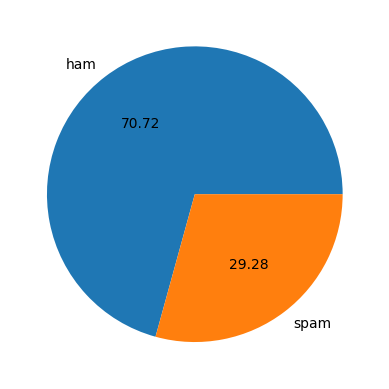

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
# Data is imbalanced

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,text,target,num_characters
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,"Subject: photoshop , windows , office . cheap ...",1,414
4,Subject: re : indian springs\r\nthis deal is t...,0,336


In [ ]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,text,target,num_characters,num_words
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,text,target,num_characters,num_words,num_sentences
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [ ]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


In [ ]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

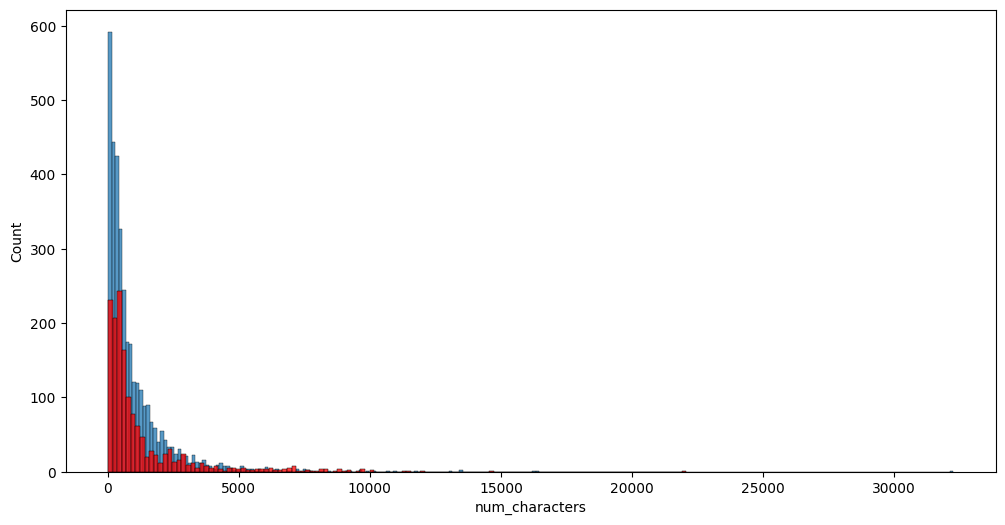

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

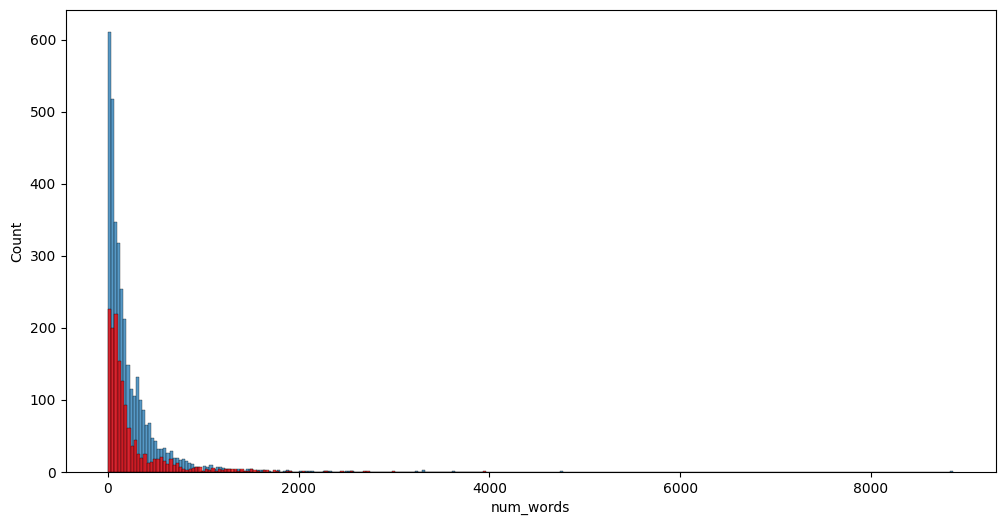

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

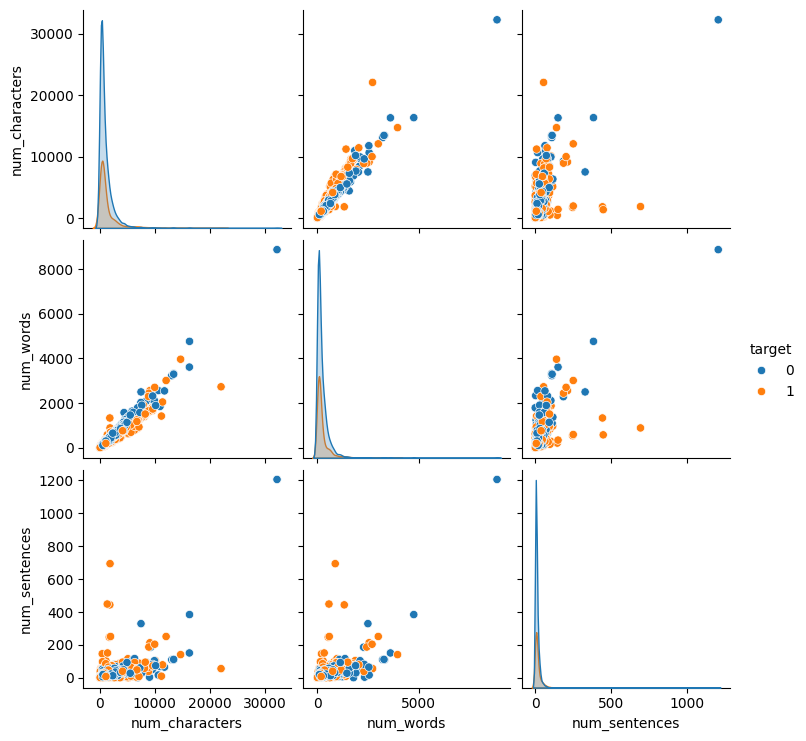

In [ ]:
sns.pairplot(df,hue='target')

<ipython-input-39-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

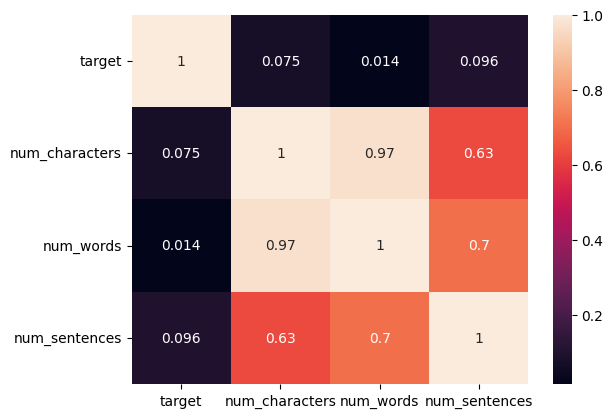

In [ ]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [ ]:
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['text'][10]

"Subject: vocable % rnd - word asceticism\r\nvcsc - brand new stock for your attention\r\nvocalscape inc - the stock symbol is : vcsc\r\nvcsc will be our top stock pick for the month of april - stock expected to\r\nbounce to 12 cents level\r\nthe stock hit its all time low and will bounce back\r\nstock is going to explode in next 5 days - watch it soar\r\nwatch the stock go crazy this and next week .\r\nbreaking news - vocalscape inc . announces agreement to resell mix network\r\nservices\r\ncurrent price : $ 0 . 025\r\nwe expect projected speculative price in next 5 days : $ 0 . 12\r\nwe expect projected speculative price in next 15 days : $ 0 . 15\r\nvocalscape networks inc . is building a company that ' s revolutionizing the\r\ntelecommunications industry with the most affordable phone systems , hardware ,\r\nonline software , and rates in canada and the us . vocalscape , a company with\r\nglobal reach , is receiving international attention for the development of voice\r\nover ip ( 

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

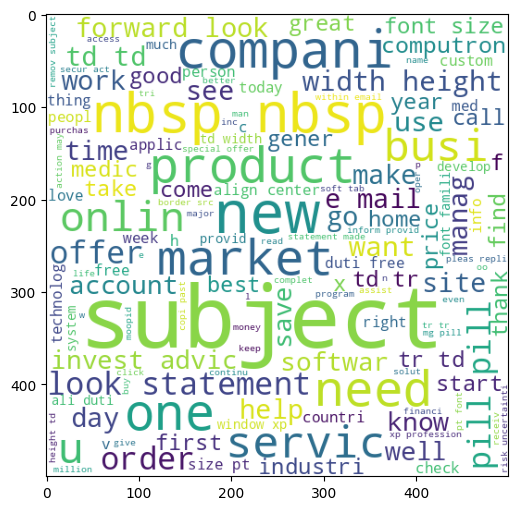

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

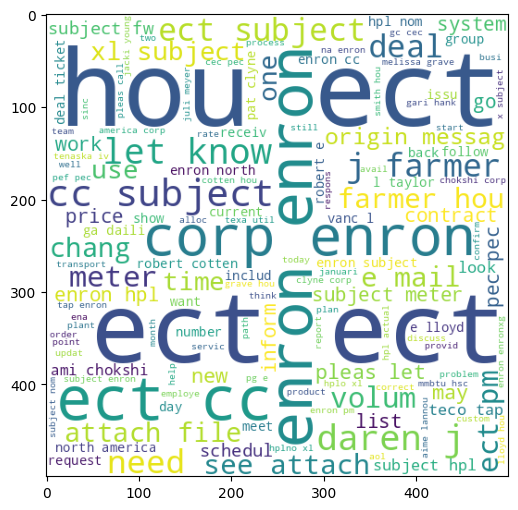

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [ ]:
len(spam_corpus)

196592

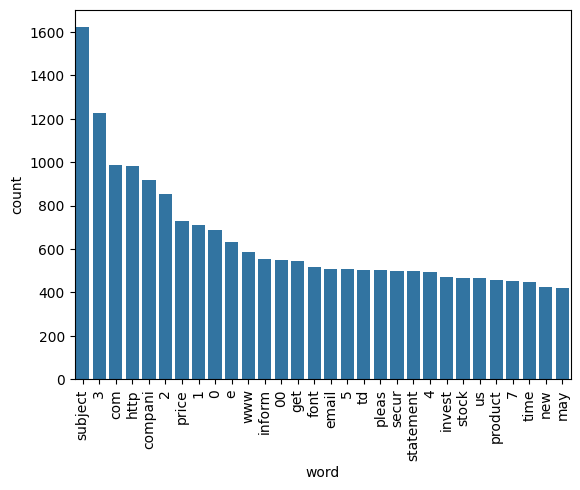

In [ ]:
from collections import Counter
data = Counter(spam_corpus).most_common(30)
df1 = pd.DataFrame(data, columns=['word', 'count'])

sns.barplot(x='word', y='count', data=df1)
plt.xticks(rotation='vertical')
plt.show()



In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

380475

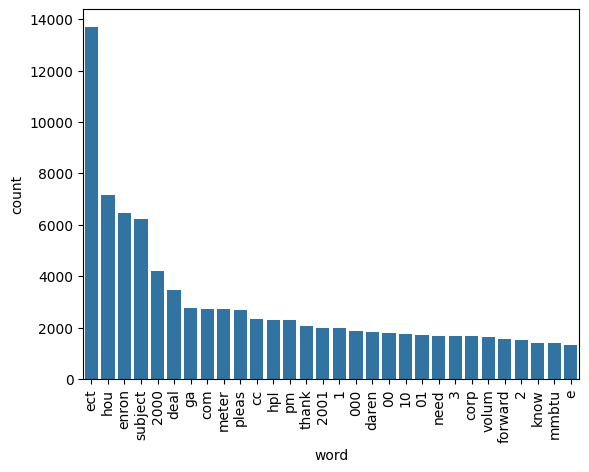

In [ ]:
from collections import Counter

data = Counter(ham_corpus).most_common(30)
df2 = pd.DataFrame(data, columns=['word', 'count'])

sns.barplot(x='word', y='count', data=df2)
plt.xticks(rotation='vertical')
plt.show()

#sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
#plt.xticks(rotation='vertical')
#plt.show()

In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


## 4. Model Building

In [ ]:
!pip install -q --upgrade keras-nlp
!pip install -q --upgrade keras  # Upgrade to Keras 3.

import keras_nlp
import keras
import tensorflow as tf
import os


keras.utils.set_random_seed(42)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.2/465.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.5 which is incompatible.


In [ ]:
!pip install keras-nlp
!pip install Keras-Preprocessing
#from keras_nlp.Preprocessing import text_preprocessor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.4 MB/s eta 0:00:00


Let's also define our hyperparameters.

In [ ]:
BATCH_SIZE = 64
EPOCHS = 3
MAX_SEQUENCE_LENGTH = 512
VOCAB_SIZE = 15000

EMBED_DIM = 128
INTERMEDIATE_DIM = 512

In [ ]:
X = df['transformed_text'].values
y = df['target'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:

import tensorflow as tf

train_dataset = list(zip(X_train, y_train))
val_dataset = list(zip(X_test, y_test))
test_dataset = list(zip(X_test, y_test))

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (
        tf.constant(X_train),
        tf.constant(y_train)
    )
)

val_ds = tf.data.Dataset.from_tensor_slices(
    (
        tf.constant(X_test),
        tf.constant(y_test)
    )
)

test_ds = tf.data.Dataset.from_tensor_slices(
    (
        tf.constant(X_test),
        tf.constant(y_test)
    )
)

train_ds = train_ds.batch(BATCH_SIZE)
val_ds = val_ds.batch(BATCH_SIZE)
test_ds = test_ds.batch(BATCH_SIZE)


ValueError: Can't convert Python sequence with mixed types to Tensor.

In [ ]:
for text_batch, label_batch in train_ds.take(1):
    for i in range(3):
        print(text_batch.numpy()[i])
        print(label_batch.numpy()[i])

b'subject eastran nomin effect 07 01 2000 forward chad w cass gc cec pec 06 26 00 03 33 pm william e speckel 06 26 00 03 21 pm briley enron com dfarmer enron com stacey neuweil enron com carlo j rodriguez enron com michael r cherri easttexa pef pec pec chad w cass gc cec pec pec julia urbanek gc cec pec pec donna c spencer gc cec pec pec john bretz gc cec pec pec bruce mcmill ftworth pef pec pec marta k henderson houston pef pec pec cc subject eastran nomin effect 07 01 2000 pleas nomin 32 800 mmbtu eastran effect 7 1 00 redeliveri made follow 25 000 mmbtu pg e 7 800 mmbtu fuel cotton valley sent behalf bruce mcmill'
0
b'subject hpl nomin decemb 28 1999 see attach file hpll 228 xl hpll 228 xl'
0
b'subject ce desk move assum test result good move ce desk appropri ena desk take place either wednesday thursday even ce im east ena im east ce im central ena im central ce im texa ena im texa move done systemat januari forward busi move complet activ deal remain ce desk follow list deal want 

In [ ]:
train_ds = train_ds.map(lambda x, y: (tf.strings.lower(x), y))
val_ds = val_ds.map(lambda x, y: (tf.strings.lower(x), y))
test_ds = test_ds.map(lambda x, y: (tf.strings.lower(x), y))

In [ ]:
def train_word_piece(ds, vocab_size, reserved_tokens):
    word_piece_ds = ds.unbatch().map(lambda x, y: x)
    vocab = keras_nlp.tokenizers.compute_word_piece_vocabulary(
        word_piece_ds.batch(1000).prefetch(2),
        vocabulary_size=vocab_size,
        reserved_tokens=reserved_tokens,
    )
    return vocab


In [ ]:
reserved_tokens = ["[PAD]", "[UNK]"]
train_sentences = [element[0] for element in train_ds]
vocab = train_word_piece(train_ds, VOCAB_SIZE, reserved_tokens)

In [ ]:
print("Tokens: ", vocab[100:110])

Tokens:  ['sale', 'nomin', 'xl', 'us', 'juli', 'flow', 'robert', 'follow', '04', '##e']


In [ ]:
tokenizer = keras_nlp.tokenizers.WordPieceTokenizer(
    vocabulary=vocab,
    lowercase=False,
    sequence_length=MAX_SEQUENCE_LENGTH,
)

## Formatting the dataset

Next, we'll format our datasets in the form that will be fed to the models. We
need to tokenize the text.

In [ ]:

def format_dataset(sentence, label):
    sentence = tokenizer(sentence)
    return ({"input_ids": sentence}, label)


def make_dataset(dataset):
    dataset = dataset.map(format_dataset, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset.shuffle(512).prefetch(16).cache()


train_ds = make_dataset(train_ds)
val_ds = make_dataset(val_ds)
test_ds = make_dataset(test_ds)

## Building the model

Now, let's move on to the exciting part - defining our model!
We first need an embedding layer, i.e., a layer that maps every token in the input
sequence to a vector. This embedding layer can be initialised randomly. We also
need a positional embedding layer which encodes the word order in the sequence.
The convention is to add, i.e., sum, these two embeddings. KerasNLP has a
`keras_nlp.layers.TokenAndPositionEmbedding ` layer which does all of the above
steps for us.

Our FNet classification model consists of three `keras_nlp.layers.FNetEncoder`
layers with a `keras.layers.Dense` layer on top.

Note: For FNet, masking the padding tokens has a minimal effect on results. In the
official implementation, the padding tokens are not masked.

In [ ]:
input_ids = keras.Input(shape=(None,), dtype="int64", name="input_ids")

x = keras_nlp.layers.TokenAndPositionEmbedding(
    vocabulary_size=VOCAB_SIZE,
    sequence_length=MAX_SEQUENCE_LENGTH,
    embedding_dim=EMBED_DIM,
    mask_zero=True,
)(input_ids)

x = keras_nlp.layers.FNetEncoder(intermediate_dim=INTERMEDIATE_DIM)(inputs=x)
x = keras_nlp.layers.FNetEncoder(intermediate_dim=INTERMEDIATE_DIM)(inputs=x)
x = keras_nlp.layers.FNetEncoder(intermediate_dim=INTERMEDIATE_DIM)(inputs=x)


x = keras.layers.GlobalAveragePooling1D()(x)
x = keras.layers.Dropout(0.1)(x)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)

fnet_classifier = keras.Model(input_ids, outputs, name="fnet_classifier")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:847: UserWarning: Layer 'f_net_encoder' (of type FNetEncoder) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.


In [ ]:
fnet_classifier.summary()
fnet_classifier.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
fnet_classifier.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

Model: "fnet_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)               │ (None, None)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_and_position_embedding         │ (None, None, 128)           │       1,985,536 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ f_net_encoder (FNetEncoder)          │ (None, None, 128)           │         132,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ f_net_encoder_1 (FNetEncoder)        │ (None, None, 128)           │         132,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ f_net_encoder_2 (FNetEncoder)        │ (None, None, 128)           │         132,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,382,337 (9.09 MB)

 Trainable params: 2,382,337 (9.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:847: UserWarning: Layer 'position_embedding' (of type PositionEmbedding) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.


63/63 ━━━━━━━━━━━━━━━━━━━━ 196s 3s/step - accuracy: 0.6678 - loss: 0.6265 - val_accuracy: 0.9680 - val_loss: 0.0958
Epoch 2/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.9783 - loss: 0.0720 - val_accuracy: 0.9730 - val_loss: 0.0628
Epoch 3/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 179s 3s/step - accuracy: 0.9977 - loss: 0.0123 - val_accuracy: 0.9870 - val_loss: 0.0333


In [ ]:
fnet_classifier.evaluate(test_ds, batch_size=BATCH_SIZE)


16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 906ms/step - accuracy: 0.9889 - loss: 0.0308


[0.03331092372536659, 0.9869869947433472]

In [ ]:
y_pred=fnet_classifier.predict(test_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step


In [ ]:
# Convert the predictions to labels if multi lables
#y_pred1 = np.argmax(y_pred, axis=1) if multi lables

 y_pred1 = [int(np.round(y)) for y in y_pred]

#y_pred1=[]
#for i in range(0,len(y_pred)):
#  y_pred1.append(int(np.round(y_pred[i])))


# extract data/labels back from TensorFlow dataset
y_test = np.concatenate([y for x, y in test_ds], axis=0)


<ipython-input-188-0b71f6f5f16b>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred1.append(int(np.round(y_pred[i])))


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
target_names = ['ham','spam']
print(classification_report(y_test, y_pred1, target_names=target_names))

print("Accuracy",accuracy_score(y_test,y_pred1))
print("Precision",precision_score(y_test,y_pred1))
print("Recall: ", recall_score(y_test, y_pred1))
print("F1Score: ", f1_score(y_test, y_pred1))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       697
        spam       0.98      0.98      0.98       302

    accuracy                           0.99       999
   macro avg       0.98      0.99      0.98       999
weighted avg       0.99      0.99      0.99       999

Accuracy 0.986986986986987
Precision 0.976897689768977
Recall:  0.9801324503311258
F1Score:  0.978512396694215


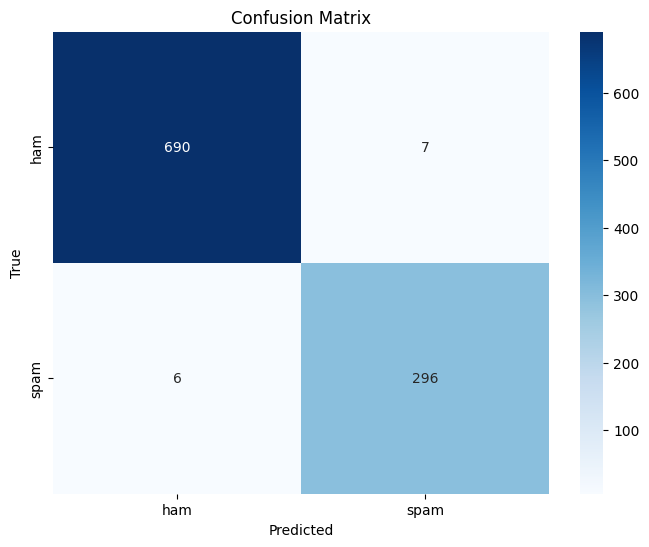

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred1)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Comparison with Transformer model

Let's compare our FNet Classifier model with a Transformer Classifier model. We
keep all the parameters/hyperparameters the same. For example, we use three
`TransformerEncoder` layers.

We set the number of heads to 2.

In [ ]:
NUM_HEADS = 2
input_ids = keras.Input(shape=(None,), dtype="int64", name="input_ids")


x = keras_nlp.layers.TokenAndPositionEmbedding(
    vocabulary_size=VOCAB_SIZE,
    sequence_length=MAX_SEQUENCE_LENGTH,
    embedding_dim=EMBED_DIM,
    mask_zero=True,
)(input_ids)

x = keras_nlp.layers.TransformerEncoder(
    intermediate_dim=INTERMEDIATE_DIM, num_heads=NUM_HEADS
)(inputs=x)
x = keras_nlp.layers.TransformerEncoder(
    intermediate_dim=INTERMEDIATE_DIM, num_heads=NUM_HEADS
)(inputs=x)
x = keras_nlp.layers.TransformerEncoder(
    intermediate_dim=INTERMEDIATE_DIM, num_heads=NUM_HEADS
)(inputs=x)


x = keras.layers.GlobalAveragePooling1D()(x)
x = keras.layers.Dropout(0.1)(x)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)

transformer_classifier = keras.Model(input_ids, outputs, name="transformer_classifier")


transformer_classifier.summary()
transformer_classifier.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
transformer_classifier.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

Model: "transformer_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)    │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ token_and_position_embed… │ (None, None, 128)      │      1,985,536 │ input_ids[0][0]        │
│ (TokenAndPositionEmbeddi… │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_encoder       │ (None, None, 128)      │        198,272 │ token_and_position_em… │
│ (TransformerEncoder)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_encoder_1     │ (None, None, 128)      │        198,272 │ transformer_encoder[0… │
│ (TransformerEncoder)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_encoder_2     │ (None, None, 128)      │        198,272 │ transformer_encoder_1… │
│ (TransformerEncoder)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_1 (NotEqual)    │ (None, None)           │              0 │ input_ids[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 128)            │              0 │ transformer_encoder_2… │
│ (GlobalAveragePooling1D)  │                        │                │ not_equal_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 128)            │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │            129 │ dropout_4[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,580,481 (9.84 MB)

 Trainable params: 2,580,481 (9.84 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:847: UserWarning: Layer 'position_embedding' (of type PositionEmbedding) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:847: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:847: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:847: Use

63/63 ━━━━━━━━━━━━━━━━━━━━ 504s 8s/step - accuracy: 0.7376 - loss: 0.6460 - val_accuracy: 0.9800 - val_loss: 0.0579
Epoch 2/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 495s 8s/step - accuracy: 0.9903 - loss: 0.0316 - val_accuracy: 0.9820 - val_loss: 0.0666
Epoch 3/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 498s 8s/step - accuracy: 0.9950 - loss: 0.0133 - val_accuracy: 0.9850 - val_loss: 0.0488


In [ ]:
transformer_classifier.evaluate(test_ds, batch_size=BATCH_SIZE)

16/16 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.9863 - loss: 0.0410


[0.048786792904138565, 0.9849849939346313]

In [ ]:
y_pred2=transformer_classifier.predict(test_ds)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:847: UserWarning: Layer 'position_embedding' (of type PositionEmbedding) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:847: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:847: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:847: Use

16/16 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step


In [ ]:
y_pred3=[]
for i in range(0,len(y_pred2)):
  y_pred3.append(int(np.round(y_pred2[i])))

# extract data/labels back from TensorFlow dataset
y_test = np.concatenate([y for x, y in test_ds], axis=0)

<ipython-input-182-24d18530dd2e>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred3.append(int(np.round(y_pred2[i])))


In [ ]:
target_names = ['ham','spam']
print(classification_report(y_test, y_pred3, target_names=target_names))

print("Accuracy",accuracy_score(y_test,y_pred3))
print("Precision",precision_score(y_test,y_pred3))
print("Overall Recall: ", recall_score(y_test, y_pred3))
print("Overall F1Score: ", f1_score(y_test, y_pred3))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       697
        spam       0.96      0.99      0.98       302

    accuracy                           0.98       999
   macro avg       0.98      0.99      0.98       999
weighted avg       0.99      0.98      0.99       999

Accuracy 0.984984984984985
Precision 0.9644012944983819
Overall Recall:  0.9867549668874173
Overall F1Score:  0.9754500818330606


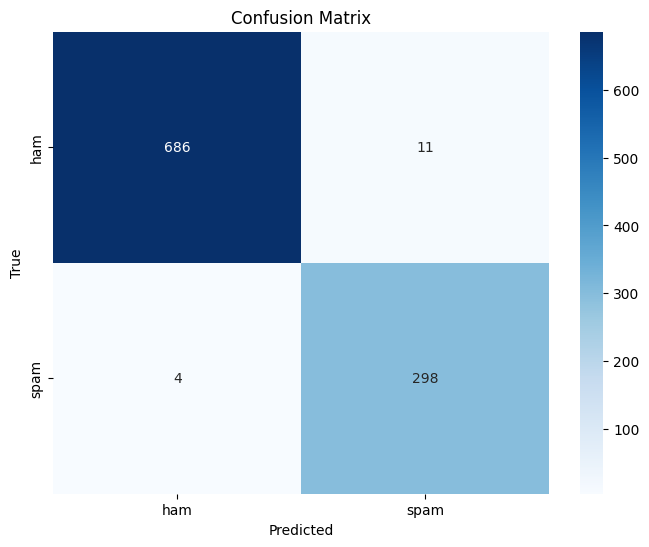

In [ ]:
cm = confusion_matrix(y_test, y_pred3)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()